In [15]:
import re
import matplotlib.pyplot as plt
import os

In [16]:
def get_file_paths(directory):
    file_paths = []  # Initialize an empty list to store file paths

    # Iterate through files in the specified directory
    for file_name in os.listdir(directory):
        # Construct full path
        full_path = os.path.join(directory, file_name)
        # Ensure it's a file (not a directory) before appending
        if os.path.isfile(full_path):
            file_paths.append(full_path)

    return file_paths
    

# List of file paths for all four files
file_paths = [
    '../Experiments/Experiments_1/Experiment_07-01-2025-16-58-28',
    '../Experiments/Experiments_1/Experiment_08-01-2025-16-01-45-Random Clustering',
    '../Experiments/Experiments_1/Experiment_08-01-2025-19-59-35- K-Mean'
]

directory = '../Experiments/Experiments/'
#file_paths = get_file_paths(directory)
print(file_paths)

# Initialize lists to store accuracies from each file
accuracies_1, accuracies_2, accuracies_3, accuracies_4 = [], [], [], []

# List to hold accuracy lists
accuracy_lists = [accuracies_1, accuracies_2, accuracies_3, accuracies_4]

# Loop through each file and extract accuracies
for i, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find the section after "SUMMARY EXPERIMENTS-"
    summary_section = content.split("SUMMARY EXPERIMENTS-")[-1]
    
    # Extract accuracy values using regex
    accuracies = re.findall(r'Accuracy:\s*([0-9]*\.?[0-9]+)', summary_section)
    
    # Convert accuracy strings to floats and store them in the corresponding list
    accuracy_lists[i].extend([float(acc) for acc in accuracies])

# Print all accuracy lists
print("Accuracies 1:", accuracies_1)
print("Accuracies 2:", accuracies_2)
print("Accuracies 3:", accuracies_3)
print("Accuracies 4:", accuracies_4)


['../Experiments/Experiments_1/Experiment_07-01-2025-16-58-28', '../Experiments/Experiments_1/Experiment_08-01-2025-16-01-45-Random Clustering', '../Experiments/Experiments_1/Experiment_08-01-2025-19-59-35- K-Mean']
Accuracies 1: [0.3661, 0.4971, 0.6121, 0.8077, 0.7926, 0.8736, 0.8865, 0.8813, 0.8979, 0.9221, 0.9087, 0.9217, 0.9291, 0.9395, 0.9406, 0.943, 0.9403, 0.9484, 0.9464, 0.9495, 0.9501, 0.9518, 0.952, 0.9548, 0.9525]
Accuracies 2: [0.328, 0.4471, 0.7849, 0.7942, 0.8545, 0.8784, 0.8816, 0.8694, 0.8743, 0.8921, 0.9235, 0.9095, 0.9269, 0.9286, 0.9301, 0.9296, 0.9439, 0.9435, 0.9515, 0.9555, 0.9548, 0.9539, 0.955, 0.9584, 0.9558]
Accuracies 3: [0.1836, 0.4384, 0.5116, 0.6617, 0.687, 0.7434, 0.765, 0.8195, 0.8281, 0.854, 0.8576, 0.8621, 0.8253, 0.8779, 0.8686, 0.867, 0.7957, 0.8101, 0.878, 0.8965, 0.8986, 0.8998, 0.9148, 0.9128, 0.9108]
Accuracies 4: []


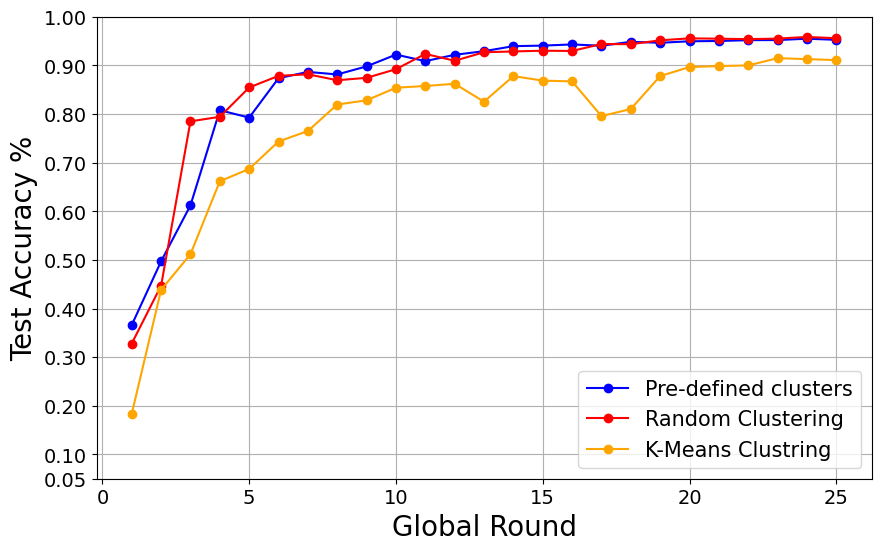

In [17]:
global_rounds = list(range(1, 26))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(global_rounds, accuracies_1, marker='o', linestyle='-', color='b', label='Pre-defined clusters')
plt.plot(global_rounds, accuracies_2, marker='o', linestyle='-', color='red', label='Random Clustering')
plt.plot(global_rounds, accuracies_3, marker='o', linestyle='-', color='orange', label='K-Means Clustring')
#plt.plot(global_rounds, accuracies_4, marker='o', linestyle='-', color='green', label='k1 = 50, k2 = 1')

plt.legend(loc="lower right", fontsize=15)

# Add labels
plt.xlabel('Global Round', fontsize=20)
plt.ylabel('Test Accuracy %', fontsize=20)

# Set the y-axis limit
plt.ylim(0.05, 1)

# Define the ticks you want on the y-axis
ticks = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Set the y-axis ticks
plt.yticks(ticks, fontsize=14)
plt.xticks(fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

In [18]:
# Initialize lists to store energies from each file
energies_1, energies_2, energies_3, energies_4 = [], [], [], []

# List to hold accuracy lists
accuracy_lists = [energies_1, energies_2, energies_3, energies_4]

# Loop through each file and extract energies
for i, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find the section after "SUMMARY EXPERIMENTS-"
    summary_section = content.split("SUMMARY EXPERIMENTS-")[-1]
    
    # Extract accuracy values using regex
    energies = re.findall(r'Energy Computation:\s*([0-9]*\.?[0-9]+)', summary_section)
    
    # Convert accuracy strings to floats and store them in the corresponding list
    accuracy_lists[i].extend([float(acc) for acc in energies])

# Print all accuracy lists
print("energies 1:", energies_1)
print("energies 2:", energies_2)
print("energies 3:", energies_3)
print("energies 4:", energies_4)


energies 1: [0.238336, 0.476672, 0.715008, 0.953344, 1.19168, 1.44256, 1.69344, 1.94432, 2.1952, 2.44608, 2.6844159999999997, 2.9227519999999996, 3.1610879999999995, 3.3994239999999993, 3.637759999999999, 3.888639999999999, 4.139519999999999, 4.3904, 4.641279999999999, 4.892159999999999, 5.130495999999999, 5.368831999999999, 5.607168, 5.845504, 6.08384]
energies 2: [0.25088, 0.50176, 0.75264, 1.00352, 1.2544, 1.50528, 1.75616, 2.00704, 2.25792, 2.5088, 2.75968, 3.01056, 3.26144, 3.51232, 3.7632, 4.01408, 4.264959999999999, 4.515839999999999, 4.766719999999999, 5.017599999999999, 5.2684799999999985, 5.519359999999999, 5.770239999999999, 6.02112, 6.272]
energies 3: [0.25088000000000005, 0.5017600000000001, 0.7526400000000001, 1.00352, 1.2544, 1.50528, 1.75616, 2.00704, 2.25792, 2.5088, 2.75968, 3.01056, 3.26144, 3.51232, 3.7632, 4.01408, 4.264959999999999, 4.515839999999999, 4.766719999999999, 5.0176, 5.26848, 5.519360000000001, 5.770240000000001, 6.021120000000002, 6.272000000000002]
en

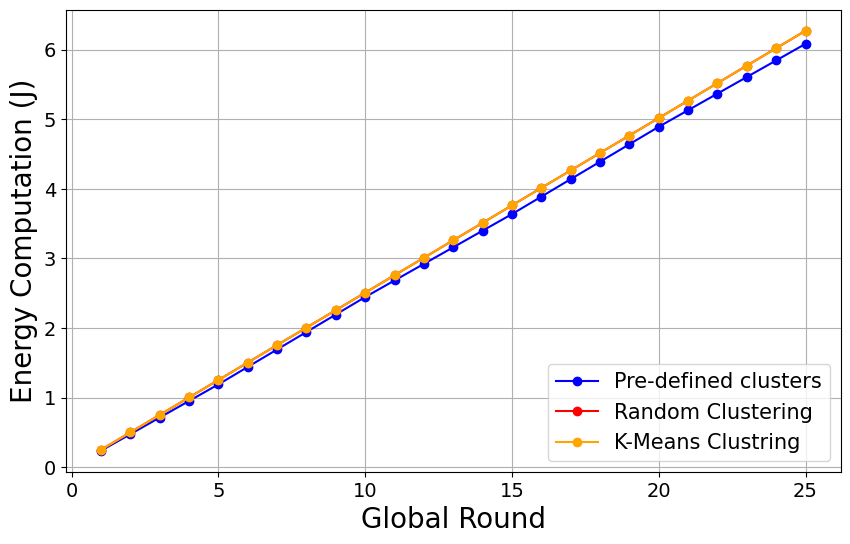

In [19]:
global_rounds = list(range(1, 26))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(global_rounds, energies_1, marker='o', linestyle='-', color='b', label='Pre-defined clusters')
plt.plot(global_rounds, energies_2, marker='o', linestyle='-', color='red', label='Random Clustering')
plt.plot(global_rounds, energies_3, marker='o', linestyle='-', color='orange', label='K-Means Clustring')
#plt.plot(global_rounds, energies_4, marker='o', linestyle='-', color='green', label='k1 = 50, k2 = 1')

plt.legend(loc="lower right", fontsize=15)

# Add labels
plt.xlabel('Global Round', fontsize=20)
plt.ylabel('Energy Computation (J)', fontsize=20)

# Set the y-axis limit
#plt.ylim(0.05, 1)

# Define the ticks you want on the y-axis
#ticks = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Set the y-axis ticks
plt.yticks( fontsize=14)
plt.xticks(fontsize=14)

# Show the plot
plt.grid(True)
plt.show()